In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.shape

(5572, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.rename(columns={'Category': 'target','Message':'text'},inplace=True)

In [7]:
df.sample(10)

,target,text
3621,ham,I meant as an apology from me for texting you ...
3905,spam,Your 2004 account for 07XXXXXXXXX shows 786 un...
5117,ham,Aslamalaikkum....insha allah tohar beeen muht ...
4242,ham,Detroit. The home of snow. Enjoy it.
918,ham,"When people see my msgs, They think Iam addict..."
3065,ham,Ok. How many should i buy.
5080,ham,Mark works tomorrow. He gets out at 5. His wor...
2908,ham,ALRITE
4798,spam,Santa calling! Would your little ones like a c...
3910,ham,Serious? What like proper tongued her


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [9]:
df['target'] = encoder.fit_transform(df['target'])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()

415

In [13]:
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5157, 2)

# EDA

In [17]:
df['target'].value_counts()

target
0    4516
1     641
Name: count, dtype: int64

In [18]:
import matplotlib.pyplot as plt

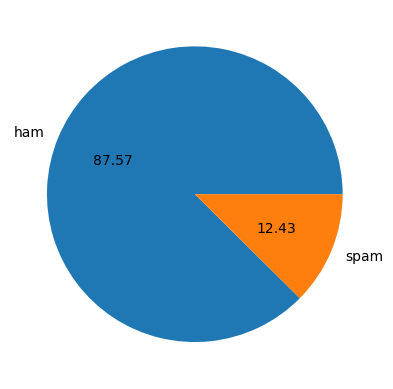

In [19]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [20]:
# data is imbalanced

In [21]:
import nltk

In [22]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yaada\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yaada\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
df['num_characters'] = df['text'].apply(len)

C:\Users\yaada\AppData\Local\Temp\ipykernel_12540\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\yaada\AppData\Local\Temp\ipykernel_12540\192676766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [26]:
df['text'][1000]

'Aight will do, thanks again for comin out'

In [27]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\yaada\AppData\Local\Temp\ipykernel_12540\4112269855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
df[df['target']==0][['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
df[df['target']==1][['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [32]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

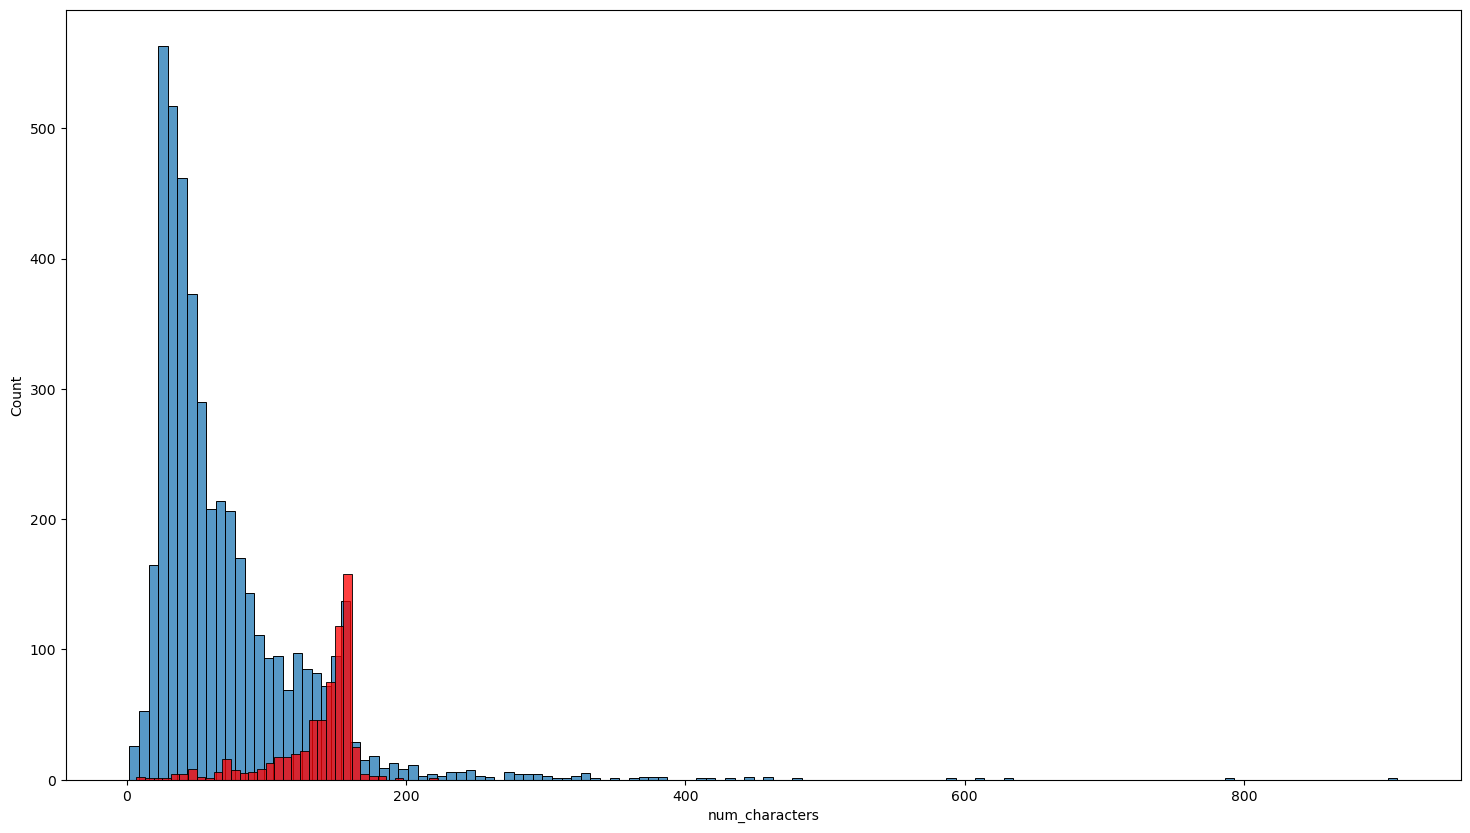

In [33]:
plt.figure(figsize = (18,10))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

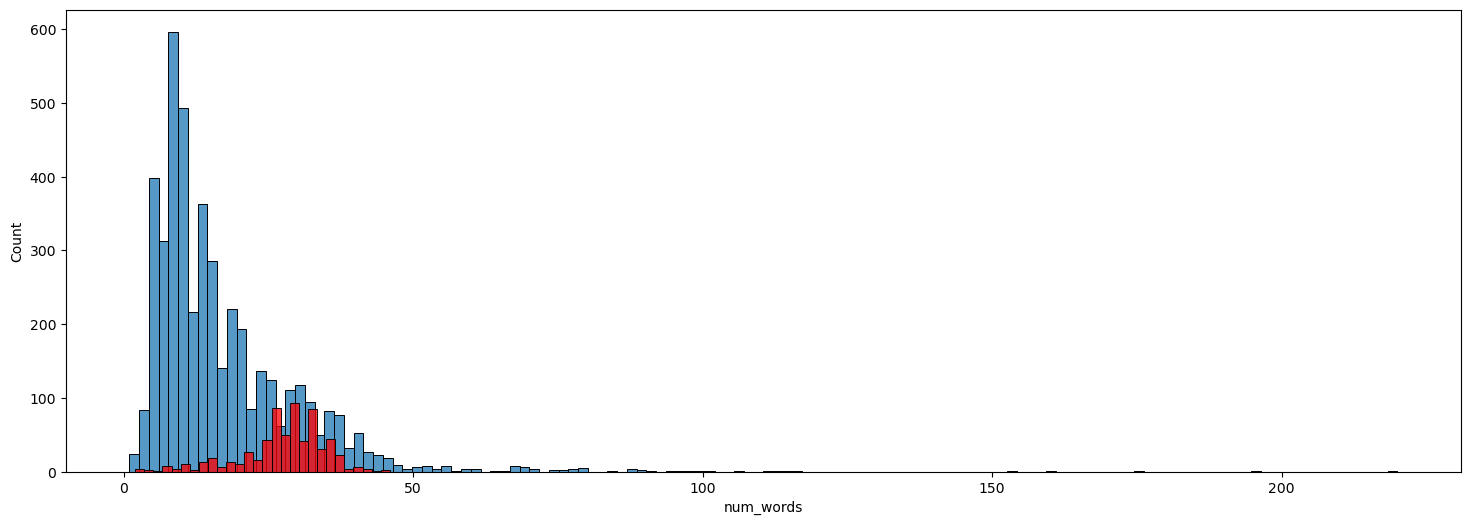

In [34]:
plt.figure(figsize = (18,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

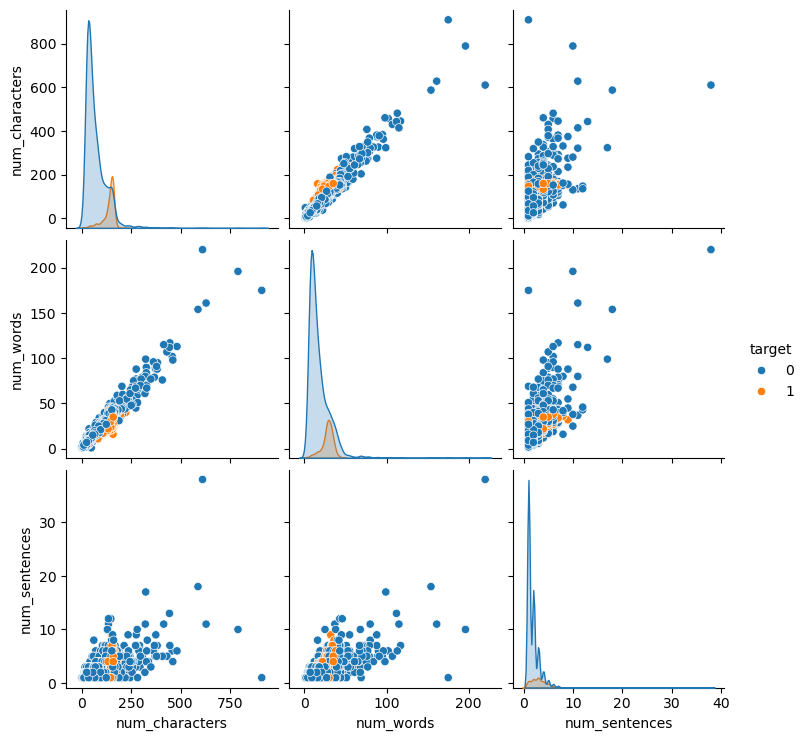

In [35]:
sns.pairplot(df,hue='target')

<Axes: >

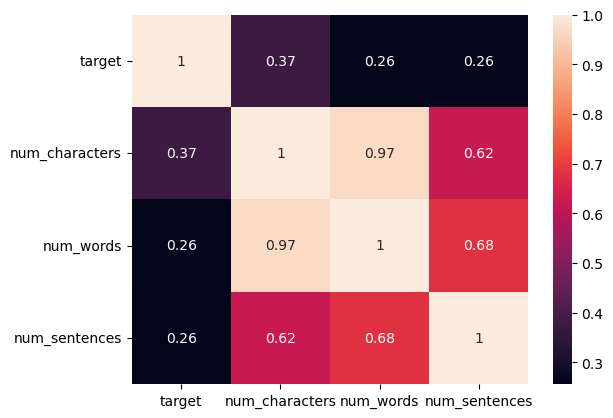

In [36]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [38]:
import string
string.punctuation
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [39]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y =[]
    for i in text: 
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [40]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [41]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [42]:
df['transform_text'] = df['text'].apply(transform_text)

C:\Users\yaada\AppData\Local\Temp\ipykernel_12540\360176214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transform_text'] = df['text'].apply(transform_text)


In [43]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=600,min_font_size=10,background_color='black')

In [52]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep=" "))

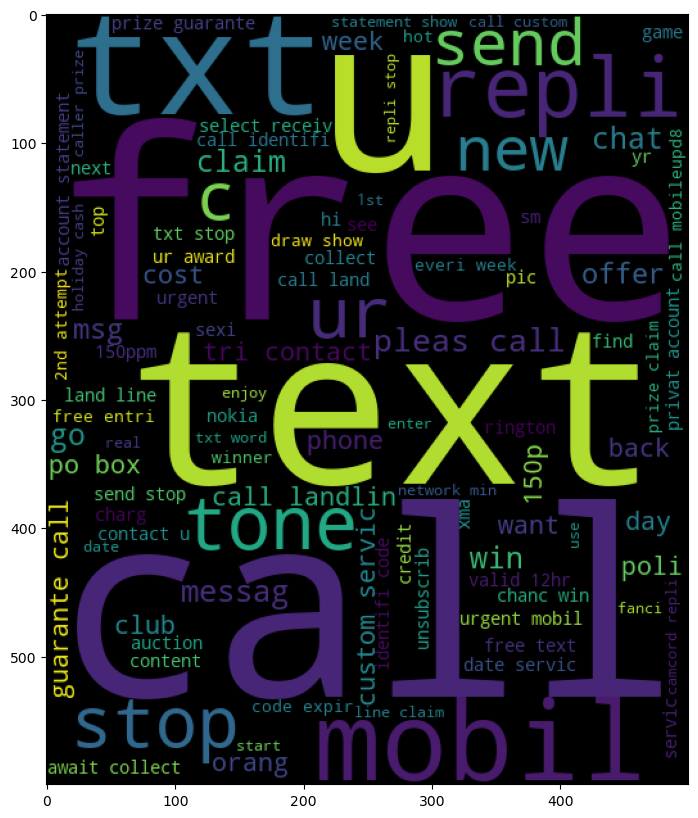

In [53]:
plt.figure(figsize=(20,10))
plt.imshow(spam_wc)


In [54]:
ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep=" "))

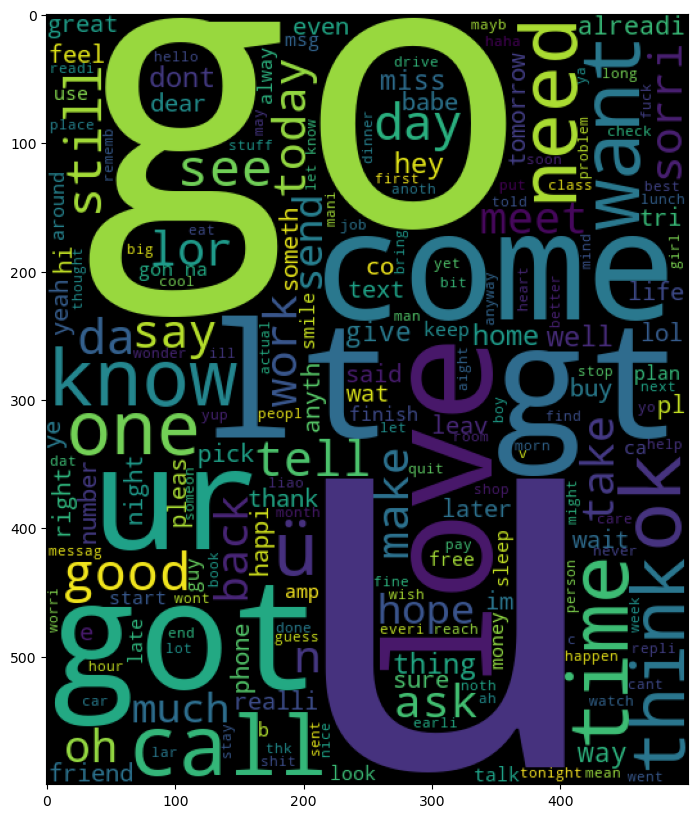

In [55]:
plt.figure(figsize=(20,10))
plt.imshow(ham_wc)


In [56]:
spam_corpus = []
for msg in df[df['target']== 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [57]:
len(spam_corpus)

9781

C:\Users\yaada\AppData\Local\Temp\ipykernel_12540\3348427104.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1],palette='rainbow')


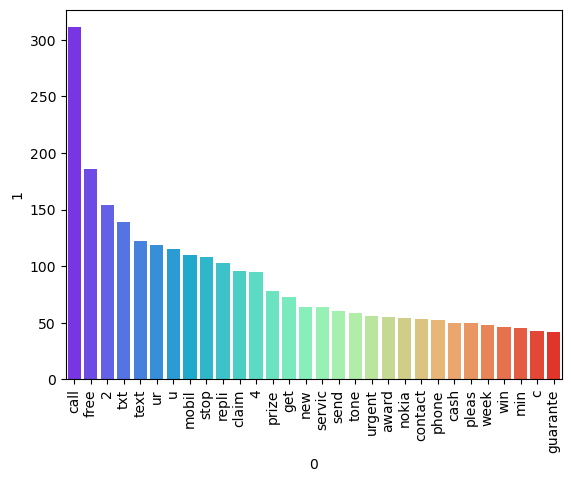

In [58]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1],palette='rainbow')
plt.xticks(rotation='vertical')
plt.show()

In [59]:
ham_corpus = []
for msg in df[df['target']== 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [60]:
len(ham_corpus)

35940

C:\Users\yaada\AppData\Local\Temp\ipykernel_12540\196708656.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1],palette='rainbow')


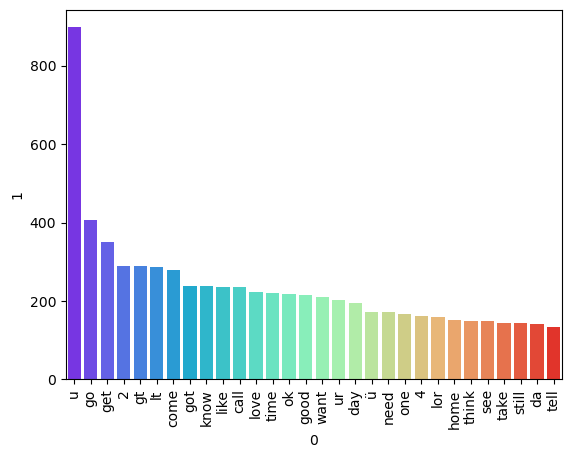

In [61]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1],palette='rainbow')
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [342]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
#tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [345]:
x =tfidf.fit_transform(df['transform_text']).toarray()

In [347]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x = scaler.fit_transform(x)

In [349]:
# appending the num_character col to x
# x = np.hstack((x,df['num_characters'].values.reshape(-1,1)))

In [351]:
x.shape

(5157, 3000)

In [353]:
y = df['target'].values

In [355]:
y.shape

(5157,)

In [357]:
from sklearn.model_selection import train_test_split


In [359]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [361]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [363]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [365]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8672480620155039
[[785 120]
 [ 17 110]]
0.4782608695652174


In [366]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709302325581395
[[905   0]
 [ 30  97]]
1.0


In [368]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835271317829457
[[903   2]
 [ 15 112]]
0.9824561403508771


In [370]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [371]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver = 'liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [375]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'Bgc' : bc,
    'ETC' : etc,
    'GBDT' : gbc,
    'XGB' : xgb
}

In [377]:
def train_classsifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [379]:
train_classsifier(svc,x_train,y_train,x_test,y_test)

(0.9757751937984496, 0.9811320754716981)

In [380]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classsifier(clf,x_train,y_train,x_test,y_test)

    print("For ", name)
    print("Accuracy -", current_accuracy)
    print("Precision - ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

For  SVC
Accuracy - 0.9757751937984496
Precision -  0.9811320754716981
For  KN
Accuracy - 0.9127906976744186
Precision -  1.0
For  NB
Accuracy - 0.9709302325581395
Precision -  1.0
For  DT
Accuracy - 0.936046511627907
Precision -  0.8210526315789474
For  LR
Accuracy - 0.9583333333333334
Precision -  0.9375
For  RF
Accuracy - 0.9728682170542635
Precision -  1.0
For  AdaBoost
Accuracy - 0.9273255813953488
Precision -  0.8421052631578947
For  Bgc
Accuracy - 0.9612403100775194
Precision -  0.8918918918918919
For  ETC
Accuracy - 0.9777131782945736
Precision -  0.9905660377358491
For  GBDT
Accuracy - 0.9554263565891473
Precision -  0.9764705882352941
For  XGB
Accuracy - 0.9738372093023255
Precision -  0.9716981132075472


In [ ]:
performance_df =pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy': accuracy_scores,'Precision': precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

In [ ]:
performance_df1 = pd.melt(performance_df,id_vars = "Algorithm")

In [ ]:
performance_df1

In [ ]:
sns.catplot(x = 'Algorithm',y= 'value',hue = 'variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. change the max_features parameter of tfidf

In [381]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [382]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.912791,1.000000
2,NB,0.970930,1.000000
5,RF,0.972868,1.000000
8,ETC,0.977713,0.990566
0,SVC,0.975775,0.981132
9,GBDT,0.955426,0.976471
10,XGB,0.973837,0.971698
4,LR,0.958333,0.937500
7,Bgc,0.961240,0.891892
6,AdaBoost,0.927326,0.842105


In [203]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [205]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.904070,1.000000,0.912791,1.000000
1,NB,0.961240,1.000000,0.970930,1.000000
2,RF,0.967054,1.000000,0.972868,1.000000
3,ETC,0.973837,1.000000,0.977713,0.990566
4,SVC,0.971899,0.980392,0.975775,0.981132
5,GBDT,0.953488,0.975904,0.955426,0.976471
6,XGB,0.970930,0.961905,0.973837,0.971698
7,LR,0.951550,0.923077,0.958333,0.937500
8,Bgc,0.962209,0.907407,0.961240,0.891892
9,AdaBoost,0.930233,0.857143,0.927326,0.842105


In [251]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [244]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y
0,KN,0.904070,1.000000,0.912791,1.000000,0.900194,1.000000
1,NB,0.961240,1.000000,0.970930,1.000000,0.978682,0.926829
2,RF,0.967054,1.000000,0.972868,1.000000,0.967054,1.000000
3,ETC,0.973837,1.000000,0.977713,0.990566,0.973837,1.000000
4,SVC,0.971899,0.980392,0.975775,0.981132,0.968992,0.920354
5,GBDT,0.953488,0.975904,0.955426,0.976471,0.953488,0.975904
6,XGB,0.970930,0.961905,0.973837,0.971698,0.970930,0.961905
7,LR,0.951550,0.923077,0.958333,0.937500,0.960271,0.957447
8,Bgc,0.962209,0.907407,0.961240,0.891892,0.962209,0.907407
9,AdaBoost,0.930233,0.857143,0.927326,0.842105,0.930233,0.857143


In [331]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [332]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.904070,1.000000,0.912791,1.000000,0.900194,1.000000,0.934109,0.739837
1,NB,0.961240,1.000000,0.970930,1.000000,0.978682,0.926829,0.878876,1.000000
2,RF,0.967054,1.000000,0.972868,1.000000,0.967054,1.000000,0.968992,1.000000
3,ETC,0.973837,1.000000,0.977713,0.990566,0.973837,1.000000,0.973837,1.000000
4,SVC,0.971899,0.980392,0.975775,0.981132,0.968992,0.920354,0.876938,0.000000
5,GBDT,0.953488,0.975904,0.955426,0.976471,0.953488,0.975904,0.951550,0.932584
6,XGB,0.970930,0.961905,0.973837,0.971698,0.970930,0.961905,0.969961,0.952830
7,LR,0.951550,0.923077,0.958333,0.937500,0.960271,0.957447,0.960271,0.957447
8,Bgc,0.962209,0.907407,0.961240,0.891892,0.962209,0.907407,0.970930,0.953271
9,AdaBoost,0.930233,0.857143,0.927326,0.842105,0.930233,0.857143,0.953488,0.924731


In [389]:
# Voting classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [391]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting = 'soft')

In [393]:
voting.fit(x_train,y_train)

,estimators,"[('svm', ...), ('nb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0
,coef0,0.0


In [394]:
y_pred = voting.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9815891472868217
Precision 1.0


In [399]:
# Applying stacking
estimators =[('svm',svc),('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()

In [401]:
from sklearn.ensemble import StackingClassifier

In [403]:
clf = StackingClassifier(estimators = estimators,final_estimator=final_estimator)

In [405]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9815891472868217
Precision 0.9736842105263158


In [407]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))